In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from matplotlib.colors import LinearSegmentedColormap
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve

In [2]:
# Load the dataset
data = pd.read_csv("card_transdata.csv")

In [3]:
# Load top 5 from dataset
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
# Explore the data generally
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
data.count()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                   1000000
used_chip                         1000000
used_pin_number                   1000000
online_order                      1000000
fraud                             1000000
dtype: int64

In [6]:
# Split the data into features (X) and the target variable (y)
X = data.drop("fraud", axis=1)
y = data["fraud"]

In [7]:
len(X)

1000000

In [8]:
len(y)

1000000

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a Random Forest model
simple_rf_model = RandomForestClassifier(random_state=42)

# Train the model
simple_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = simple_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

# Display the evaluation metrics
print("Simple Random Forest Model Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Simple Random Forest Model Metrics:
Accuracy: 0.99997
Precision: 1.0
Recall: 0.999656770207654
F1 Score: 0.9998283556470992
ROC AUC: 0.999828385103827


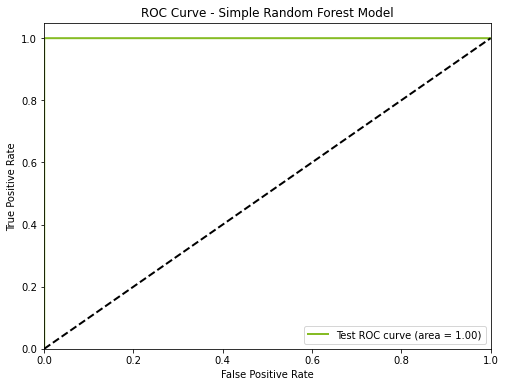

In [10]:
# Define Deloitte green color in RGB
deloitte_green_rgb = (134/255, 188/255, 37/255)

# Calculate ROC curve and ROC AUC
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, simple_rf_model.predict_proba(X_test)[:, 1])
roc_auc_test = roc_auc_score(y_test, y_pred_test)

# Plot ROC curve with Deloitte green and black lines
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color=deloitte_green_rgb, lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')  # Black dotted line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Simple Random Forest Model')
plt.legend(loc="lower right")
plt.show()

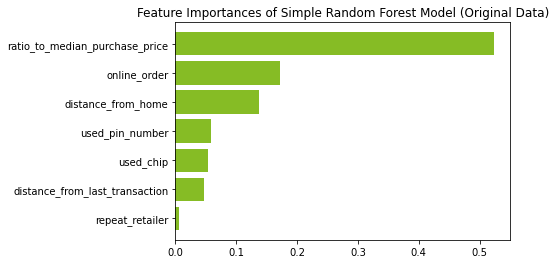

In [11]:
# Assuming you have X_train and y_train from your original data

# Get feature importances
feature_importance_original = simple_rf_model.feature_importances_

# Get feature names from your DataFrame
feature_names = X.columns.tolist()

# Sort features by importance
sorted_idx_original = feature_importance_original.argsort()

# Define Deloitte green color in RGB
deloitte_green_rgb = (134/255, 188/255, 37/255)

# Plot the sorted feature importances with Deloitte green color
plt.barh(range(len(feature_importance_original)), feature_importance_original[sorted_idx_original], tick_label=np.array(feature_names)[sorted_idx_original], color=deloitte_green_rgb)

# Add a title to the plot
plt.title("Feature Importances of Simple Random Forest Model (Original Data)")

plt.show()

In [12]:
len(y_train)

800000

In [13]:
len(X_train)

800000

In [14]:
len(X_test)
len(y_test)

200000

In [15]:
len(y_test)

200000

In [16]:
# Data Preprocessing: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Smote for Training Data

In [18]:
# Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train your model on SMOTE-enhanced training data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [19]:
len(X_train_smote)

1460156

In [20]:
len(y_train_smote)

1460156

In [21]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV instance with verbose=1
grid_search = GridSearchCV(rf_model, param_grid, scoring='roc_auc', cv=2, n_jobs=8, verbose=3)

In [22]:
# Perform grid search for hyperparameter tuning
grid_search.fit(X_train_smote, y_train_smote)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  4.7min
[Parallel(n_jobs=8)]: Done  28 out of  32 | elapsed:  8.9min remaining:  1.3min
[Parallel(n_jobs=8)]: Done  32 out of  32 | elapsed:  9.8min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=8,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='roc_auc', verbose=3)

In [23]:
print("Best Parameters: ", grid_search.best_params_)
print("Best ROC AUC Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best ROC AUC Score:  0.999999962803971


In [24]:
# Access mean and std scores
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

print("Mean Scores:", mean_scores)
print("Standard Deviation Scores:", std_scores)

Mean Scores: [0.99999911 0.99999899 0.9999965  0.999999   0.99999955 0.99999935
 0.99999902 0.99999919 0.9999985  0.99999995 0.99999927 0.99999996
 0.99999943 0.99999983 0.99999977 0.99999991]
Standard Deviation Scores: [1.24289445e-07 1.15070173e-07 1.30762259e-06 5.64277982e-07
 6.79475732e-08 5.32620270e-07 6.37182274e-07 5.59827816e-07
 1.49624620e-06 4.79537225e-08 7.14225295e-07 2.86821795e-08
 5.53105665e-07 1.55489382e-07 1.60639342e-07 7.53151110e-08]


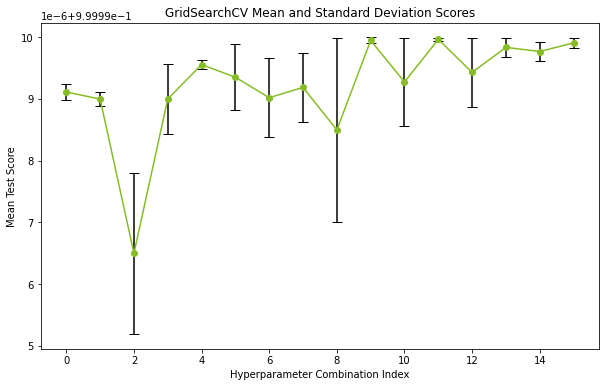

In [25]:
# Define Deloitte green color in RGB
deloitte_green_rgb = (134/255, 188/255, 37/255)

# Access mean and std scores
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

# Plot mean scores with error bars using Deloitte green color
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(mean_scores)), mean_scores, yerr=std_scores, fmt='o-', color=deloitte_green_rgb, ecolor='black', capsize=5)
plt.title('GridSearchCV Mean and Standard Deviation Scores')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Mean Test Score')
plt.show()

In [26]:
# Print the statement with actual values
print(f"The GridSearchCV results indicate a successful cross-validation with optimal hyperparameter values selected. Mean cross-validated score: {mean_scores.mean():.4f}, Standard deviation of the cross-validated scores: {std_scores.mean():.4f}.")

The GridSearchCV results indicate a successful cross-validation with optimal hyperparameter values selected. Mean cross-validated score: 1.0000, Standard deviation of the cross-validated scores: 0.0000.


In [27]:
# Get the best model
best_rf_model = grid_search.best_estimator_

In [28]:
# Evaluate the best model
y_pred_rf = best_rf_model.predict(X_test)

In [29]:
# Evaluation Metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

In [30]:
# Display Results for Random Forest
print("Random Forest Model with SMOTE Training Data Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"ROC AUC: {roc_auc_rf}")

Random Forest Model with SMOTE Training Data Metrics:
Accuracy: 0.99997
Precision: 0.9999427819419809
Recall: 0.999713975173045
F1 Score: 0.999828365467132
ROC AUC: 0.9998542481456972


# Cheatsheet for True/False Positive/Negative matrix
-------------------
| TN | FP |
|----|----|
| FN | TP |
-------------------


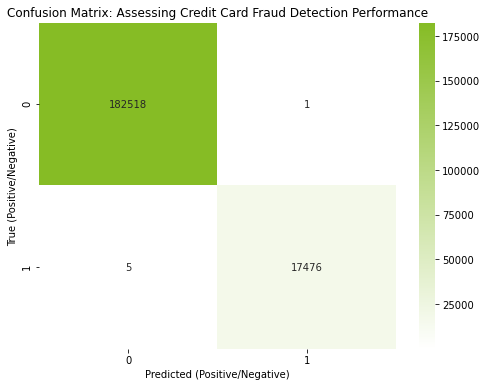

In [31]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Define Deloitte green color in RGB
deloitte_green_rgb = (134/255, 188/255, 37/255)

# Define your custom gradient from Deloitte green to white
custom_gradient = {
    'red':   ((0.0, 1.0, 1.0),
              (1.0, deloitte_green_rgb[0], deloitte_green_rgb[0])),
    'green': ((0.0, 1.0, 1.0),
              (1.0, deloitte_green_rgb[1], deloitte_green_rgb[1])),
    'blue':  ((0.0, 1.0, 1.0),
              (1.0, deloitte_green_rgb[2], deloitte_green_rgb[2]))
}

# Create a custom colormap using the defined gradient
custom_cmap = LinearSegmentedColormap('custom_colormap', custom_gradient)

# Assuming 'conf_matrix' is your confusion matrix
plt.figure(figsize=(8, 6))

# Plot the heatmap using the custom colormap
heatmap = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=custom_cmap)

# Customize the colorbar
cbar = heatmap.collections[0].colorbar
# Add ticks from 0 to 175000, increasing by 25000
cbar.set_ticks(np.arange(0, 200000, 25000))

plt.xlabel('Predicted (Positive/Negative)')
plt.ylabel('True (Positive/Negative)')
plt.title('Confusion Matrix: Assessing Credit Card Fraud Detection Performance')
plt.show()

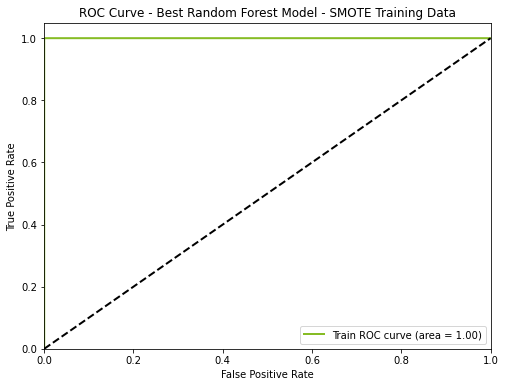

In [32]:
# Define Deloitte green color in RGB
deloitte_green_rgb = (134/255, 188/255, 37/255)

# Calculate ROC curve and ROC AUC for best_rf_model
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_smote, best_rf_model.predict_proba(X_train_smote)[:, 1])
roc_auc_train = roc_auc_score(y_train_smote, best_rf_model.predict(X_train_smote))

# Plot ROC curve with Deloitte green and black lines
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color=deloitte_green_rgb, lw=2, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')  # Black dotted line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Random Forest Model - SMOTE Training Data')
plt.legend(loc="lower right")
plt.show()


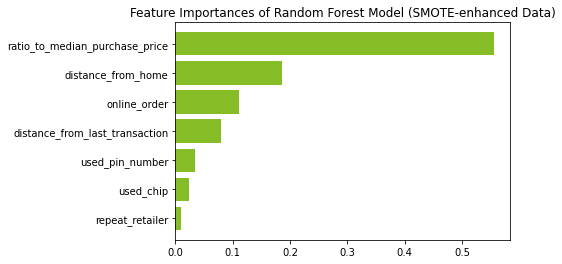

In [33]:
# Use the best model for prediction on SMOTE-enhanced training data
y_pred_train_smote = best_rf_model.predict(X_train_smote)

# Get feature importances
feature_importance_smote = best_rf_model.feature_importances_

# Get feature names from your DataFrame
feature_names = X.columns.tolist()

# Sort features by importance
sorted_idx_smote = feature_importance_smote.argsort()

# Define Deloitte green color in RGB
deloitte_green_rgb = (134/255, 188/255, 37/255)

# Plot the sorted feature importances with Deloitte green color
plt.barh(range(len(feature_importance_smote)), feature_importance_smote[sorted_idx_smote], tick_label=np.array(feature_names)[sorted_idx_smote], color=deloitte_green_rgb)

# Add a title to the plot
plt.title("Feature Importances of Random Forest Model (SMOTE-enhanced Data)")

plt.show()

# Raw Spread of Data and Correlation

Raw counts: 

0.0    912597
1.0     87403
Name: fraud, dtype: int64
-----------------------------------
Normalized counts: 

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64


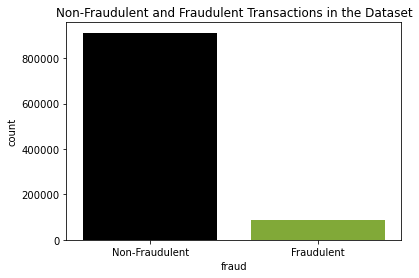

In [34]:
# Define Deloitte green and black colors in RGB
deloitte_green_rgb = (134/255, 188/255, 37/255)
black_rgb = (0, 0, 0)

# Create a custom color palette with alternating black and green
colors = [black_rgb, deloitte_green_rgb]

print('Raw counts: \n')
print(data['fraud'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(data['fraud'].value_counts(normalize=True))

# Plot count plot with alternating black and green bars
ax = sns.countplot(x=data['fraud'], data=data, palette=colors)
ax.set_title('Non-Fraudulent and Fraudulent Transactions in the Dataset')
ax.set_xticklabels(['Non-Fraudulent', 'Fraudulent'])

plt.show()


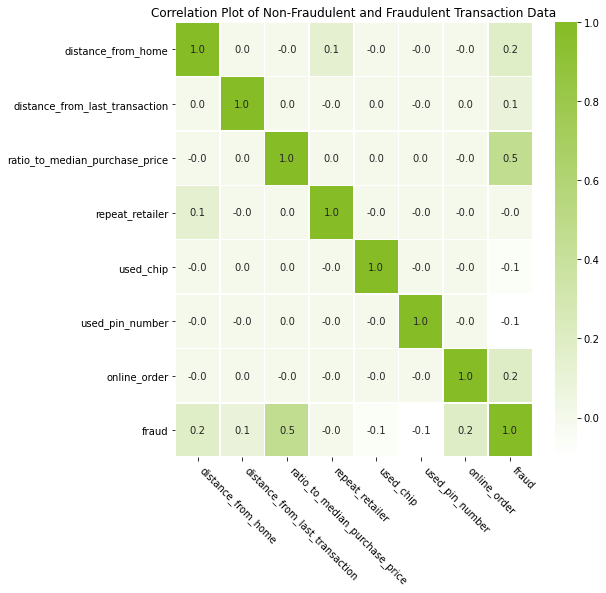

In [35]:
# Define Deloitte green color in RGB
deloitte_green_rgb = (134/255, 188/255, 37/255)

# Create a custom colormap with a gradient from white to Deloitte green
cmap = LinearSegmentedColormap.from_list('deloitte_green_gradient', ['white', deloitte_green_rgb])

# Assuming 'data' is your DataFrame
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', cmap=cmap)
plt.title('Correlation Plot of Non-Fraudulent and Fraudulent Transaction Data')

# Rotate x-axis labels by 45 degrees
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=-45, ha='left')

plt.show()